#### Carga de Librerias

In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_theme(style="darkgrid")

#### Carga de archivo json a Dataframe

In [2]:
filename='token_VS_vocabulary.json'
with open(filename, 'r') as f:
    data=pd.DataFrame(json.load(f))

#### procesamiento incremental de texto

In [3]:
token_lst=[]
token=[]
vocabulary=[]
for text in data.iloc[0:250,0]:
    corpus=''.join(text)       
    token_lst+=re.split('\W+',corpus.lower())
    vocabulary_lst=Counter(token_lst).most_common()    
    token.append(len(token_lst))
    vocabulary.append(len(vocabulary_lst))

#### estimacion de modelo utilizando la ley de Heaps

In [4]:
df=pd.DataFrame({'token':token,'vocabulary':vocabulary})
df['estimated']=np.sqrt(df.token)
coef=(df['vocabulary']/df['estimated']).mean()   
df['Ley de Heaps '+str(int(round(coef,0)))+'*N^1/2']=int(round(coef,0))*np.sqrt(df.token)

#### Grafica Token VS Vocabulary (practico y teorico)

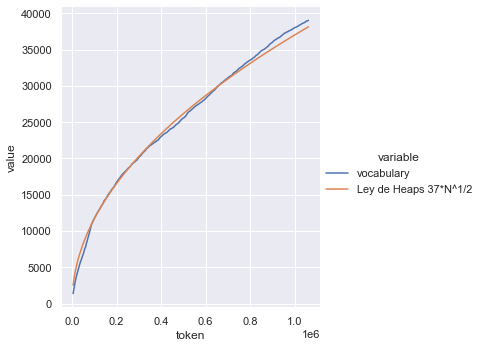

In [5]:
sns.relplot(x="token", y="value", kind="line", hue='variable',data=df.melt(id_vars =['token'], value_vars =['vocabulary', 'Ley de Heaps '+str(int(round(coef,0)))+'*N^1/2']))       
plt.show()
